# Task-3 To Explore Unsupervised Machine Learning


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\SADDAL\Documents\jupyter notebooks\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Information of Dataset

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


###### NO NULL VALUES FOUND

In [5]:
#count of the different categories in species
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

## Visualizing the dataset

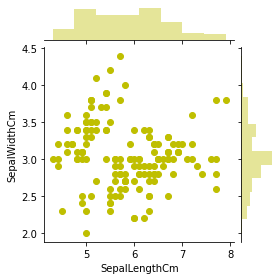

In [6]:
#plot between sepal length and width
sns.jointplot(x="SepalLengthCm",y="SepalWidthCm",data=df,kind="scatter",color="y", height=4)

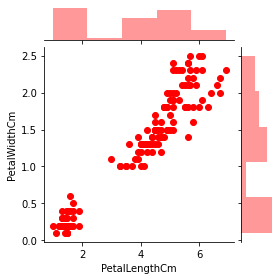

In [7]:
#plot between petal length and width
sns.jointplot(x="PetalLengthCm",y="PetalWidthCm",data=df,kind="scatter",color="r", height=4)

## Elbow Method

In [8]:
# Calulating the value of Within cluster sum of squares(sse)
X = df.drop(labels=["Species"], axis=1).values
sse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300)
    km.fit(X)
    sse.append(km.inertia_)
print(sse)

[281918.32439999987, 70616.29893333331, 31365.589670588226, 17778.669815078236, 11441.17861957731, 7930.727651282046, 5920.723721437981, 4591.783080667354, 3575.3361029411767, 2964.442545949149]


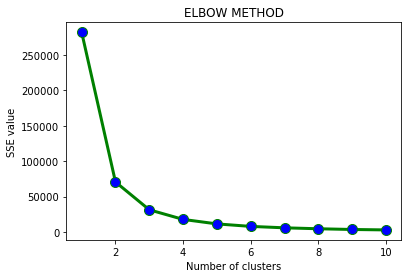

In [9]:
# Plotting the results of the elbow method
plt.plot(range(1,11),sse,color="green",linestyle="solid", linewidth="3", marker="o" , markerfacecolor="b", markersize=10)
plt.title("ELBOW METHOD")
plt.xlabel("Number of clusters")
plt.ylabel("SSE value")
plt.show();

The optimum clusters is where the elbow occurs. This is when the sum of squares within clusters doesn't decrease significantly with every iteration.
Let's take the optimum number of clusters 3

## Applying K-means Clustering

In [10]:
km = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300)
y_pred = km.fit_predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Visualizing the Clusters

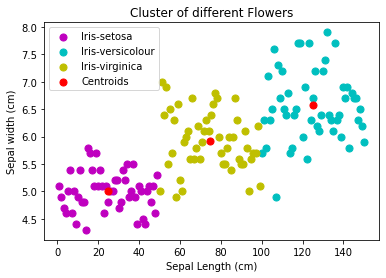

In [12]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=50, c='m', label='Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=50, c='c', label='Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=50, c='y', label='Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 50, c = 'r', label = 'Centroids')
plt.title("Cluster of different Flowers")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

######  Predicted the optimum number of clusters and represented it visually. 